In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import ttest_1samp, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [30]:
# seleccionamos un database de data.world que nos da informacion sobre accidentes en bicicleta en North Carolina
# cargamos y seleccionamos las columnas que nos interesan

crash_df = pd.read_csv('north-carolina-bicycle-crash-data_1.csv', 
                       sep=';', 
                       usecols=[2, 8, 17, 22, 29, 36, 42, 44, 59])
crash_df.head()

,bikerace,bikesex,bikeagegrp,rdconditio,drvrsex,crashmonth,crashday,bikeage,weather
0,Hispanic,Male,20-24,Wet,Female,July,Wednesday,22,Cloudy
1,Black,Male,30-39,Dry,Male,August,Tuesday,31,Clear
2,White,Male,60-69,Dry,Female,September,Monday,66,Clear
3,White,Female,20-24,Dry,Unknown,August,Friday,20,Clear
4,Black,Male,nov-15,Dry,Female,August,Tuesday,11,Clear


In [31]:
crash_df.describe()

,bikeage
count,7353.000000
mean,31.698082
std,17.287965
min,0.000000
25%,17.000000
50%,28.000000
75%,47.000000
max,70.000000


In [32]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7353 entries, 0 to 7352
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bikerace    7353 non-null   object
 1   bikesex     7353 non-null   object
 2   bikeagegrp  7353 non-null   object
 3   rdconditio  7353 non-null   object
 4   drvrsex     7353 non-null   object
 5   crashmonth  7353 non-null   object
 6   crashday    7353 non-null   object
 7   bikeage     7353 non-null   int64 
 8   weather     7353 non-null   object
dtypes: int64(1), object(8)
memory usage: 517.1+ KB


In [33]:
# ordenamos el dataset por las edades de los accidentados

crash_df = crash_df.sort_values(['bikeage'])
crash_df

,bikerace,bikesex,bikeagegrp,rdconditio,drvrsex,crashmonth,crashday,bikeage,weather
2740,White,Male,0-5,Dry,Male,October,Friday,0,Clear
65,White,Male,0-5,Dry,Male,October,Wednesday,1,Clear
1129,White,Female,0-5,Dry,Male,May,Monday,1,Cloudy
5127,Other,Female,0-5,Dry,Unknown,November,Monday,2,Clear
657,Black,Male,0-5,Unknown,Unknown,August,Wednesday,2,Other
...,...,...,...,...,...,...,...,...,...
3084,White,Male,70+,Dry,Female,September,Friday,70,Clear
3974,White,Female,70+,"Sand, Mud, Dirt, Gravel",Male,June,Monday,70,Clear
4074,Black,Male,70+,Dry,Female,August,Friday,70,Cloudy
589,White,Male,70+,Dry,Female,April,Tuesday,70,Clear


# Nivel 1

## Ejercicio 1

#### Escoge un conjunto de datos de tema deportivo que te guste y selecciona un atributo del conjunto de datos.
#### Calcula el p-valor y di si rechaza la hipotesis nula cogiendo un alfa del 5%

Text(0.5, 0, 'Edad')

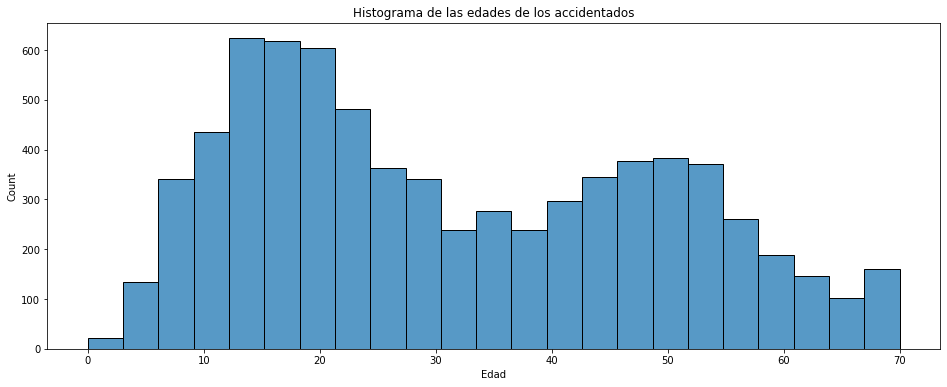

In [34]:
# Histograma de las edades de los accidentados

plt.figure(figsize=(16, 6))
sns.histplot(data=crash_df, x='bikeage')

plt.title('Histograma de las edades de los accidentados')
plt.xlabel('Edad')

In [18]:
# funcion media

def mean(dataset):
    return sum(dataset) / len(dataset)

In [35]:
# calculamos la media de edad de los accidentados

print(mean(crash_df['bikeage']))

31.69808241534068


Hipotesis:

- Hipotesis Nula: La edad media de accidentados es de 31 años.
- Hipotesis Alternativa: La edad media de accidentados no es de 31 años.

In [36]:
# Utilizamos 1 sample t-test

alpha = 0.05

stat, p = ttest_1samp(crash_df['bikeage'].dropna(), popmean=31)

print(f't-statistic = {stat:.3f}\np-value = {p:.3f}')
print('No rechaza la Hipotesis Nula') if p > alpha else print('Rechaza la Hipotesis Nula')

t-statistic = 3.463
p-value = 0.001
Rechaza la Hipotesis Nula


# Nivel 2

## Ejercicio 2

#### Continua con el conjunto de datos de tema deportivo que te guste y selecciona dos otros atributos del conjunto de datos 
#### Calcula los p-valores y di si rechazan la hipotesis nula cogiendo un alfa del 5%

In [37]:
# Convertimos en categorica la columna bikesex

crash_df['bikesex'] = crash_df['bikesex'].astype('category')

In [38]:
# Cogemos los nombres de la columna bikeage que tienen el valor Unknown

indexNames = crash_df[ crash_df['bikesex'] == 'Unknown' ].index

# Borramos esas filas del dataFrame

crash_df.drop(indexNames , inplace=True)
crash_df

,bikerace,bikesex,bikeagegrp,rdconditio,drvrsex,crashmonth,crashday,bikeage,weather
2740,White,Male,0-5,Dry,Male,October,Friday,0,Clear
65,White,Male,0-5,Dry,Male,October,Wednesday,1,Clear
1129,White,Female,0-5,Dry,Male,May,Monday,1,Cloudy
5127,Other,Female,0-5,Dry,Unknown,November,Monday,2,Clear
657,Black,Male,0-5,Unknown,Unknown,August,Wednesday,2,Other
...,...,...,...,...,...,...,...,...,...
3084,White,Male,70+,Dry,Female,September,Friday,70,Clear
3974,White,Female,70+,"Sand, Mud, Dirt, Gravel",Male,June,Monday,70,Clear
4074,Black,Male,70+,Dry,Female,August,Friday,70,Cloudy
589,White,Male,70+,Dry,Female,April,Tuesday,70,Clear


Text(0.5, 0, 'Edad')

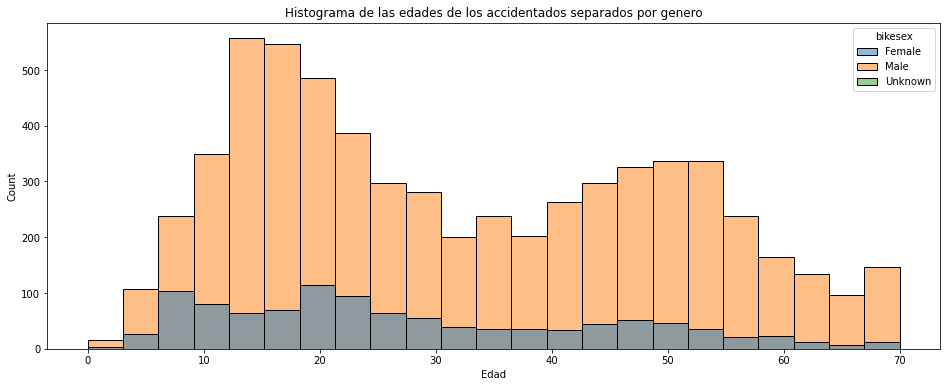

In [39]:
# Histograma de la distribucion de edades segun el genero 

plt.figure(figsize=(16, 6))
sns.histplot(data=crash_df, x='bikeage', hue='bikesex')

plt.title('Histograma de las edades de los accidentados separados por genero')
plt.xlabel('Edad')

In [40]:
crash_df['bikesex'].value_counts()

Male       6249
Female     1074
Unknown       0
Name: bikesex, dtype: int64

Hipotesis:

- Hipotesis Nula: La edad media de accidentados hombres, ES IGUAL a la de las accidentadas mujeres.
- Hipotesis Alternativa: La edad media de los accidentados hombres, NO ES IGUAL que la de las accidentadas mujeres.

In [42]:
# Utilizamos la prueba 2-tailed Welchs' t-test

alfa = 0.05

male_age = crash_df.loc[crash_df['bikesex'] == 'Male','bikeage'].dropna()
female_age = crash_df.loc[crash_df['bikesex'] == 'Female','bikeage'].dropna()

stat, p = ttest_ind(male_age,female_age, alternative='two-sided', equal_var=False)

print(f't-statistic = {stat:.3f}\np-value = {p:.3f}')
print('No rechaza la Hipotesis Nula') if p > alpha else print('Rechaza la Hipotesis Nula')

t-statistic = 8.087
p-value = 0.000
Rechaza la Hipotesis Nula
